In [341]:
import tensorflow as tf ## pip install tensorflow

Loading - "MNIST Data Set"
Containing Training Samples = 60,000; Testing Samples= 10,000
TensorFlow already contain MNIST data swt which dan be loaded using keras

In [342]:
mnist = tf.keras.datasets.mnist ## this is basically handwritten characters based on 28 * 28 sized of images of 0 to 9

After loading the MNIST data, Divide into Train and Test datasets

In [343]:
## unpacking the dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [344]:
x_train.shape

(60000, 28, 28)

In [345]:
import matplotlib.pyplot ## pip install matplotlib

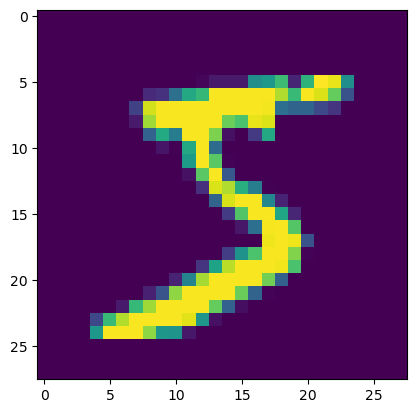

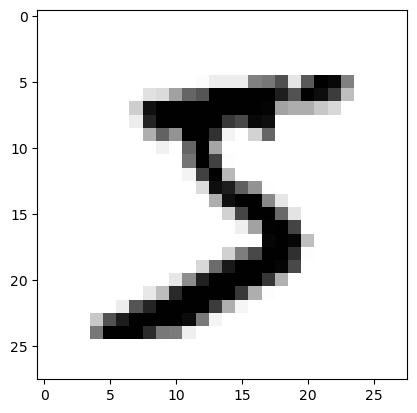

In [346]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() ## in order to execute the graph
## however we don't know whether its color image or binary images
## so in order to plot it change the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)

Checking the values of each pixel before Normalization

In [347]:
print (x_train[0]) ## before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

As images are in Grey level (1 channel => 0 to 255), not Colored (RGB)
Normalizing the data | Pre-Precessing Step

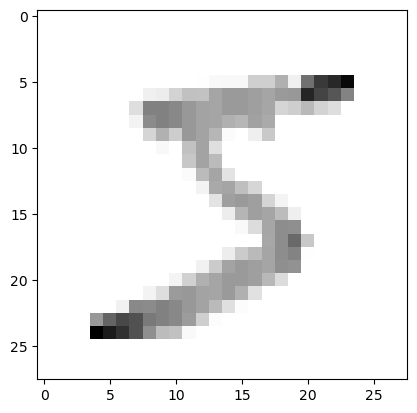

In [348]:
## it's gray image and all values from 0 to 255
## in order to normalize it
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

After Normaliztion


In [349]:
print(x_train[0]) ## Normalized value

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [350]:
print (y_train[0]) ## just to check that we have labels inside our network

5


Resizing image to make it suitabble for apply Convolution operation


In [351]:
import numpy as np ## pip install numpy
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## increasing one dimension for kernel=filter operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## increasing one dimension for kernel operation
print ("Training Samples dimension", x_trainr.shape)
print ("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


Creating a Deep Neural Network
Training on 60,000 samples of MNIST Handwritten dataset

In [352]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [353]:
## Creating a neural network
model = Sequential ()

## 1st Convolution Layer 0 1 2 3 (60,000 28, 28, 1) 28-3+1=26*26
model.add (Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) ## only for 1st comvolution layer to mention input layer size
model.add(Activation("relu")) ## Activation function to make it non-linear, < 0 remove, > 0
model.add(MaxPooling2D(pool_size=(2,2))) ## Max Pooling maximum value of 2 * 2

## 2nd Convolution layer
model.add(Conv2D(64,(3,3))) ## 2nd Convolution layer
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

## 3rd Convolution layer
model.add(Conv2D(64, (3,3))) ## 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## Fully Connected layer # 1  20*20=400
model.add (Flatten()) ## before using fully connected layer, need to be flatten so that 2D to 1D
model.add (Dense(64))
model.add(Activation("relu"))

## fully connected layer # 2  
model.add (Dense(32))
model.add(Activation("relu"))

## last fully connected layer, output must be equal to number of classes, 10 (0-9)
model.add (Dense(10)) ## last dense layer must be equal to 10
model.add(Activation("softmax")) ## activation function is changed to softmax (Class probabilities)

In [354]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_40 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_41 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [355]:
print ("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [356]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [357]:
model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3) ## Training my model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.8913 - loss: 0.3475 - val_accuracy: 0.9548 - val_loss: 0.1528
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9679 - loss: 0.1064 - val_accuracy: 0.9624 - val_loss: 0.1215
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9758 - loss: 0.0767 - val_accuracy: 0.9726 - val_loss: 0.0894
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9812 - loss: 0.0611 - val_accuracy: 0.9776 - val_loss: 0.0729
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9848 - loss: 0.0486 - val_accuracy: 0.9769 - val_loss: 0.0763


In [358]:
## Evaluating on testing data set MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test Loss on 10,000 test samples", test_loss)
print ("Validation Accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9811 - loss: 0.0693
Test Loss on 10,000 test samples 0.06926877796649933
Validation Accuracy on 10,000 test samples 0.9811000227928162


In [360]:
predictions = model.predict([x_testr])
## instead of using new model loaded, for now I am using simple model

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [361]:
print (predictions) ## these predictions are based on one hot encoding so there are only array, caontaining softmaz predictions

[[4.5291236e-07 3.2059899e-05 1.4194836e-05 ... 9.9995196e-01
  2.7536240e-08 3.3563128e-07]
 [1.0624286e-03 8.8751345e-05 9.9883693e-01 ... 7.8028397e-06
  3.4882370e-07 2.0584414e-06]
 [4.6963382e-06 9.9989784e-01 2.7377987e-06 ... 3.9099243e-05
  9.3081331e-07 5.7325819e-06]
 ...
 [3.9633907e-10 1.1874490e-06 1.5727708e-10 ... 2.8231904e-08
  4.7295323e-08 1.6009084e-05]
 [1.2664274e-05 2.1423142e-08 9.7535686e-09 ... 8.7404295e-08
  8.6371820e-06 1.8617959e-05]
 [3.2598316e-06 2.8702884e-08 6.4095093e-07 ... 1.0731337e-08
  8.5818851e-07 5.7196849e-07]]


In [493]:
import cv2 ## pip install opencv-python

In [494]:
img = cv2.imread("6.png")

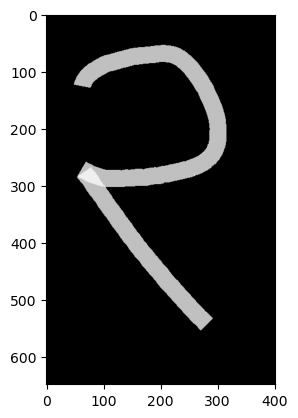

In [495]:
plt.imshow(img)

In [496]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [497]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [498]:
resized.shape

(28, 28)

In [499]:
newimg = tf.keras.utils.normalize (resized, axis = 1) ## 0 to 1 scaling

In [500]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## kernel operation of convolution layer

In [501]:
newimg.shape

(1, 28, 28, 1)

In [502]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [503]:
print (np.argmax(predictions))

3
